# Gears and Parts Creation for Importing Data

In [2]:
import os
import datetime
import wget
from zipfile import ZipFile
import pandas as pd
from sqlalchemy import create_engine



# Suggestions and Improvement

Three loops for Importing, Unzipping and Connecting to DB can be done under single loop.



In [2]:
# Generating URL

import datetime

def getBSEBhav(x):
    m = x.strftime("%m")
    y = x.strftime("%y")
    d = x.strftime("%d")
    
    l = "https://www.bseindia.com/download/Bhavcopy/Equity/EQ{}{}{}_CSV.ZIP".format(d,m,y)
    
    return l

In [3]:
# importing URL data

import wget
try:
    filename = wget.download(url)
    print(filename)
except:
    pass



In [4]:
# DDownloading zip file using BSE url

def BSEBhav(x):
    a =  getBSEBhav(x)
    filename = wget.download(a)

In [5]:
#creating directories

def makemydir(whatever):
  try:
    os.makedirs(whatever)
  except OSError:
    pass


#set directory
d = 'C:\\Users\\ajayd'

def create_BSE_folder(d):
    #creating Equity folder
    name = "Equity Data 2"
    makemydir(name)
    base_folder_add = d+"\\"+name
    os.chdir(base_folder_add)
    
    name = "BSE"
    makemydir(name)
    BSE_folder_add = base_folder_add+"\\"+name
    os.chdir(BSE_folder_add)
    
    name = "BSE_Zipped"
    makemydir(name)
    BSE_zip = BSE_folder_add + "\\"+name
    
    name = "BSE_Unzipped"
    makemydir(name)
    BSE_unzip = BSE_folder_add + "\\"+name
    
    return base_folder_add,BSE_folder_add,BSE_zip, BSE_unzip

In [6]:
# handling imported zip file 

# importing required modules 
from zipfile import ZipFile

file_add = "Address"
# specifying the zip file name 
file_name = file_add
  

# Quick reponse function  
    
def unzipping(Zip,Unzip):
    os.chdir(Zip)
    a = os.getcwd()
    l = list(os.listdir())
    l = [a+"\\"+s for s in l]

    for i in l:
        n = i
        with ZipFile(n, 'r') as zip: 
            zip.printdir() 
            print('Extracting all the files now...') 
            zip.extractall(Unzip)
            zip.close()
            print('Done!') 

# Putting it together

In [7]:
#set directory
d = 'C:\\Users\\ajayd'

from datetime import date, timedelta
edate = datetime.datetime(2020, 1, 19)   # end date
sdate = datetime.datetime(2019, 1, 19)   # start date

def get_BSEdata(d,sdate,edate):
    equity, BSE, Zip, Unzip = create_BSE_folder(d)
    
    # getting zip files
    os.chdir(Zip)
    delta = edate - sdate 
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        try:
            BSEBhav(day)
            print("{} Succefully imported.".format(day))
        except:
            print("data {} not available .".format(day))
            pass
    
    unzipping(Zip,Unzip)
    print("Done")
    return Zip, Unzip

Zip, Unzip = get_BSEdata(d,sdate,edate)

data 2019-01-19 00:00:00 not available .
data 2019-01-20 00:00:00 not available .
2019-01-21 00:00:00 Succefully imported.
2019-01-22 00:00:00 Succefully imported.
2019-01-23 00:00:00 Succefully imported.
2019-01-24 00:00:00 Succefully imported.
2019-01-25 00:00:00 Succefully imported.
data 2019-01-26 00:00:00 not available .
data 2019-01-27 00:00:00 not available .
2019-01-28 00:00:00 Succefully imported.
2019-01-29 00:00:00 Succefully imported.
2019-01-30 00:00:00 Succefully imported.
2019-01-31 00:00:00 Succefully imported.
2019-02-01 00:00:00 Succefully imported.
data 2019-02-02 00:00:00 not available .
data 2019-02-03 00:00:00 not available .
2019-02-04 00:00:00 Succefully imported.
2019-02-05 00:00:00 Succefully imported.
2019-02-06 00:00:00 Succefully imported.
2019-02-07 00:00:00 Succefully imported.
2019-02-08 00:00:00 Succefully imported.
data 2019-02-09 00:00:00 not available .
data 2019-02-10 00:00:00 not available .
2019-02-11 00:00:00 Succefully imported.
2019-02-12 00:00

# Creating DataBase

In [4]:
# decoding file name to date
def filename2date(a):
    d = int(a[2:4])
    m = int(a[4:6])
    y = int("20"+ a[6:8])
    x = datetime.datetime(y, m,d)
    return x

In [28]:
# Getting unzip file csvs to SQL
#change direc
Unzip = "C:\\Users\\ajayd\\Equity Data 2\\BSE\\BSE_Unzipped"

os.chdir(Unzip)

XL_files = list(os.listdir())

#Creating engine
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
#Database Name 
DB = "DB"

#looping over files
for i in range(len(XL_files)):
    xl = XL_files[i]
    d = Unzip
    xls = pd.read_csv(xl)
    date = filename2date(xl)
    xls["DATE"] = date
    xls.to_sql(name=DB,con=engine,if_exists='append',index=False)


# SHOOTING QUERY

In [29]:
query = '''
SELECT CLOSE,DATE,SC_NAME
FROM DB
WHERE DB.SC_CODE IN (500010, 532215,532174);
'''
df = pd.read_sql_query(query,engine)
print(df["DATE"])

df = pd.pivot_table(df, index = "DATE",columns = "SC_NAME")
print(df)
df.sort_values(by='DATE')
#df["DATE"]  = pd.to_datetime(df["DATE"])


0      2020-01-01 00:00:00.000000
1      2020-01-01 00:00:00.000000
2      2020-01-01 00:00:00.000000
3      2019-02-01 00:00:00.000000
4      2019-02-01 00:00:00.000000
                  ...            
727    2019-10-31 00:00:00.000000
728    2019-10-31 00:00:00.000000
729    2019-12-31 00:00:00.000000
730    2019-12-31 00:00:00.000000
731    2019-12-31 00:00:00.000000
Name: DATE, Length: 732, dtype: object
                                  CLOSE                          
SC_NAME                    AXIS BANK    HDFC         ICICI BANK  
DATE                                                             
2019-01-21 00:00:00.000000       660.25      2003.30       371.25
2019-01-22 00:00:00.000000       661.80      1982.60       369.00
2019-01-23 00:00:00.000000       661.40      1957.65       367.65
2019-01-24 00:00:00.000000       663.95      1969.05       365.00
2019-01-25 00:00:00.000000       667.75      1977.60       357.10
...                                 ...          ...       

CLOSE                          
SC_NAME                    AXIS BANK    HDFC         ICICI BANK  
DATE                                                             
2019-01-21 00:00:00.000000       660.25      2003.30       371.25
2019-01-22 00:00:00.000000       661.80      1982.60       369.00
2019-01-23 00:00:00.000000       661.40      1957.65       367.65
2019-01-24 00:00:00.000000       663.95      1969.05       365.00
2019-01-25 00:00:00.000000       667.75      1977.60       357.10
...                                 ...          ...          ...
2020-01-13 00:00:00.000000       737.45      2463.90       538.55
2020-01-14 00:00:00.000000       747.65      2492.70       537.45
2020-01-15 00:00:00.000000       746.15      2485.90       535.40
2020-01-16 00:00:00.000000       737.30      2482.20       537.00
2020-01-17 00:00:00.000000       739.80      2453.95       530.90

[244 rows x 3 columns]

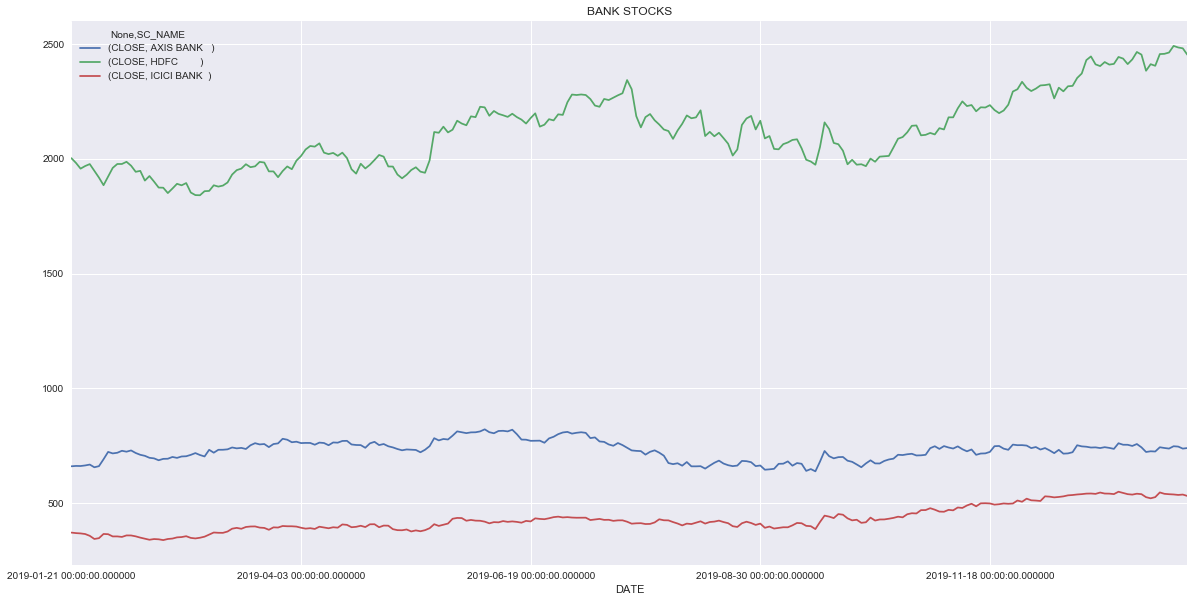

In [30]:
##QUICK DATA VIZ
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline
title = "BANK STOCKS"
df.plot(figsize=(20, 10),title = title)